
## Предобработка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 150

In [2]:
path = './house-prices-advanced-regression-techniques/'

датасет https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [3]:
data_train = pd.read_csv(path + 'train.csv')
data_test = pd.read_csv(path + 'test.csv')

In [4]:
data_train.shape, data_test.shape

((1460, 81), (1459, 80))

In [5]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [6]:
num_features = data_train.select_dtypes(np.number).drop(columns=['Id', 'SalePrice']).columns
num_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data_train,
    data_train.SalePrice,
    test_size=0.2,
    random_state=42
)

### Замена nan
https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html

In [8]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')

X_train_numeric = X_train[num_features]
X_test_numeric = X_test[num_features]

imp_mean.fit(X_train_numeric)

X_train_numeric_fillna = pd.DataFrame(imp_mean.transform(X_train_numeric), columns=num_features)
X_test_numeric_fillna = pd.DataFrame(imp_mean.transform(X_test_numeric), columns=num_features)
X_train_numeric_fillna.shape, X_test_numeric_fillna.shape

((1168, 36), (292, 36))

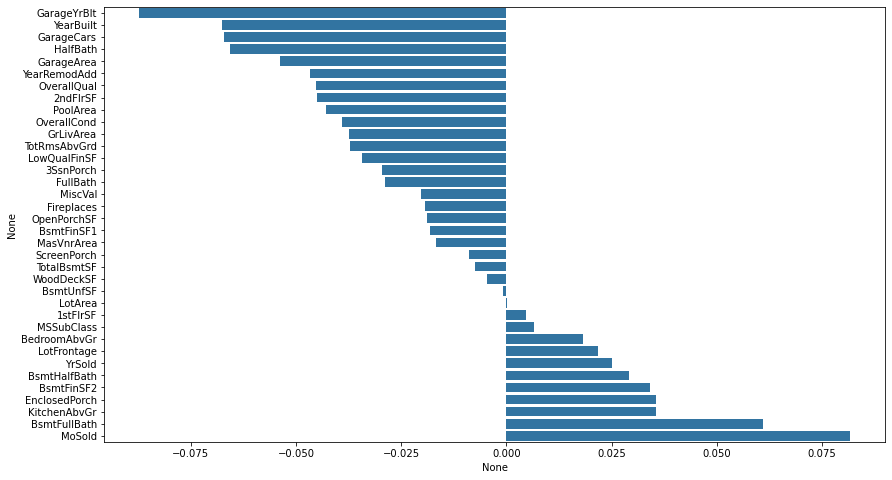

In [9]:
corr = X_train_numeric_fillna.corrwith(y_train).sort_values()
plot = sns.barplot(y=corr.index, x=corr)
plot.figure.set_size_inches(14, 8)

In [10]:
reg = LinearRegression().fit(X_train_numeric_fillna, y_train)

In [11]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(reg.predict(X_train_numeric_fillna), y_train)}',
    f'test: {root_mean_squared_error(reg.predict(X_test_numeric_fillna), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(reg.predict(X_train_numeric_fillna), y_train)}',
    f'test: {mean_absolute_error(reg.predict(X_test_numeric_fillna), y_test)}',
)

RMSE:  train: 33925.41552631739 test: 36830.92253623277
MAE:  train: 21074.83224863508 test: 22980.737835833697


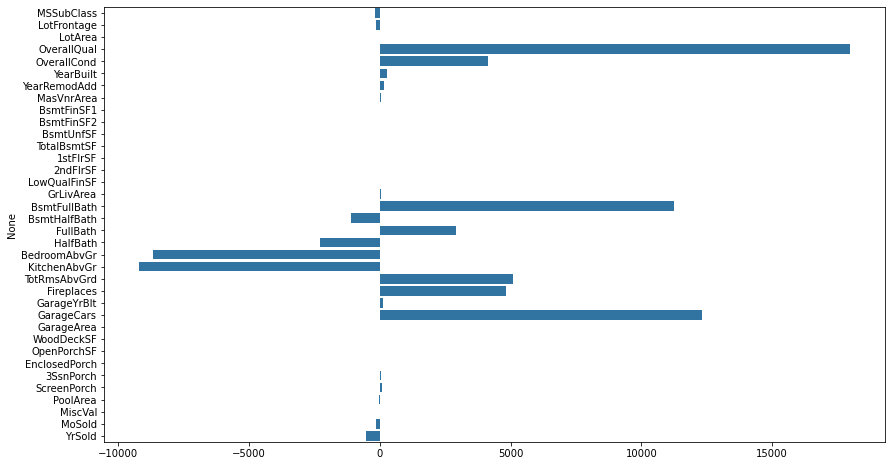

In [12]:
plot = sns.barplot(y=num_features, x=reg.coef_)
plot.figure.set_size_inches(14, 8)

### Нормирование признаков

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_numeric_fillna)

X_train_numeric_fillna_scaled = pd.DataFrame(scaler.transform(X_train_numeric_fillna), columns=num_features)
X_test_numeric_fillna_scaled = pd.DataFrame(scaler.transform(X_test_numeric_fillna), columns=num_features)

In [14]:
reg = LinearRegression().fit(X_train_numeric_fillna_scaled, y_train)

In [15]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(reg.predict(X_train_numeric_fillna_scaled), y_train)}',
    f'test: {root_mean_squared_error(reg.predict(X_test_numeric_fillna_scaled), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(reg.predict(X_train_numeric_fillna_scaled), y_train)}',
    f'test: {mean_absolute_error(reg.predict(X_test_numeric_fillna_scaled), y_test)}',
)

RMSE:  train: 33927.70104836576 test: 36834.73568969639
MAE:  train: 21070.547746480792 test: 22997.244551729837


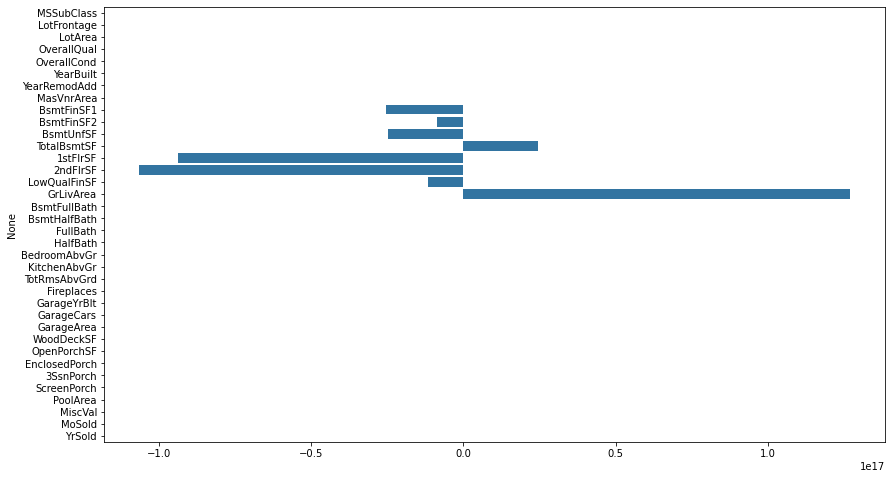

In [16]:
plot = sns.barplot(y=num_features, x=reg.coef_)
plot.figure.set_size_inches(14, 8)

### Регуляризация

https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html

In [17]:
from sklearn.linear_model import Ridge
reg = Ridge().fit(X_train_numeric_fillna_scaled, y_train)

In [18]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(reg.predict(X_train_numeric_fillna_scaled), y_train)}',
    f'test: {root_mean_squared_error(reg.predict(X_test_numeric_fillna_scaled), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(reg.predict(X_train_numeric_fillna_scaled), y_train)}',
    f'test: {mean_absolute_error(reg.predict(X_test_numeric_fillna_scaled), y_test)}',
)

RMSE:  train: 33925.44805767377 test: 36830.03600515701
MAE:  train: 21069.651320583405 test: 22971.94669783736


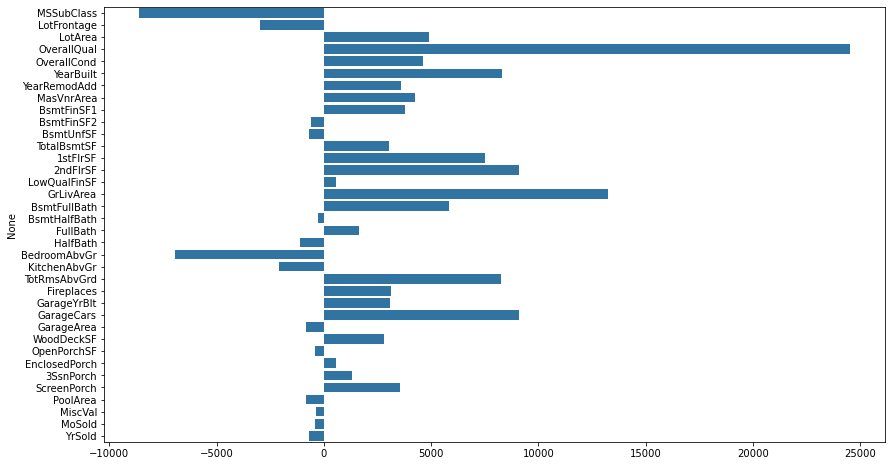

In [19]:
plot = sns.barplot(y=num_features, x=reg.coef_)
plot.figure.set_size_inches(14, 8)

### Что с таргетом?

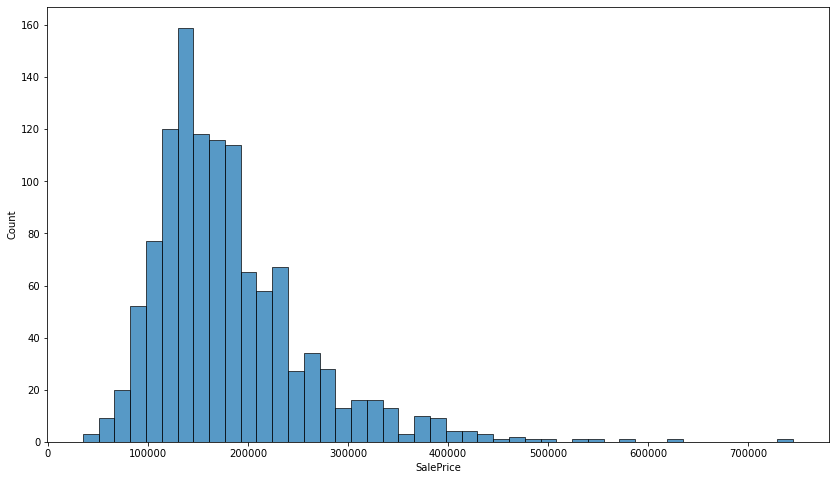

In [20]:
plot = sns.histplot(y_train)
plot.figure.set_size_inches(14, 8)

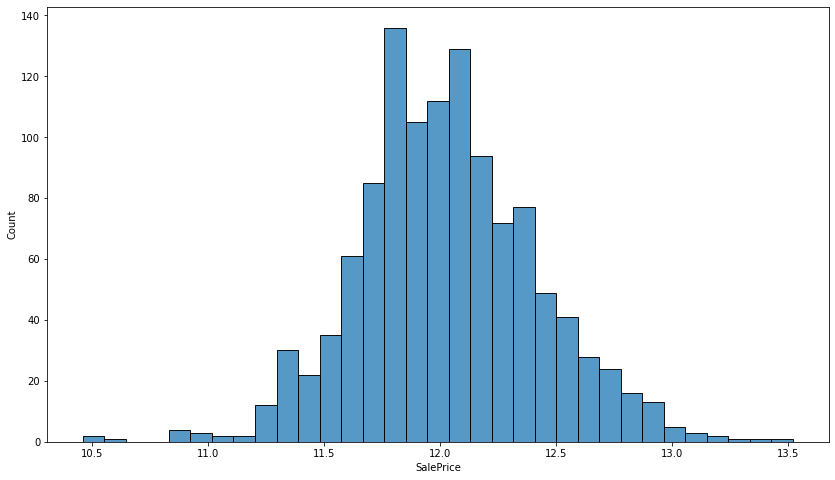

In [21]:
plot = sns.histplot(np.log(y_train))
plot.figure.set_size_inches(14, 8)

In [22]:
reg = Ridge().fit(X_train_numeric_fillna_scaled, np.log(y_train))

In [23]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(np.exp(reg.predict(X_train_numeric_fillna_scaled)), y_train)}',
    f'test: {root_mean_squared_error(np.exp(reg.predict(X_test_numeric_fillna_scaled)), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(np.exp(reg.predict(X_train_numeric_fillna_scaled)), y_train)}',
    f'test: {mean_absolute_error(np.exp(reg.predict(X_test_numeric_fillna_scaled)), y_test)}',
)

RMSE:  train: 36277.642247570766 test: 29816.29263102564
MAE:  train: 17892.132900217795 test: 19151.72372476715


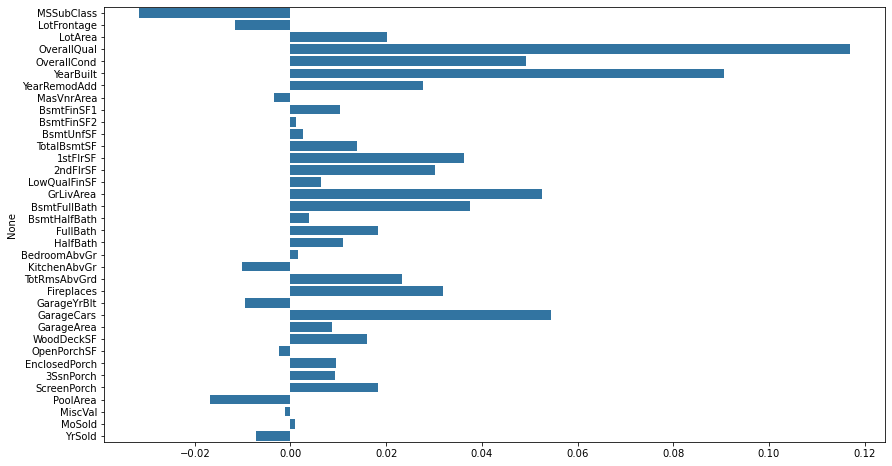

In [24]:
plot = sns.barplot(y=num_features, x=reg.coef_)
plot.figure.set_size_inches(14, 8)

### Pipeline

https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.make_pipeline.html

In [25]:
from sklearn.pipeline import Pipeline, make_pipeline

In [26]:
simple_pipeline = Pipeline([
    ('imp_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', Ridge())
])

In [27]:
simple_pipeline.fit(X_train_numeric, np.log(y_train))

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('model', Ridge())])

In [28]:
simple_pipeline.get_params()

{'memory': None,
 'steps': [('imp_mean', SimpleImputer()),
  ('scaler', StandardScaler()),
  ('model', Ridge())],
 'verbose': False,
 'imp_mean': SimpleImputer(),
 'scaler': StandardScaler(),
 'model': Ridge(),
 'imp_mean__add_indicator': False,
 'imp_mean__copy': True,
 'imp_mean__fill_value': None,
 'imp_mean__keep_empty_features': False,
 'imp_mean__missing_values': nan,
 'imp_mean__strategy': 'mean',
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__alpha': 1.0,
 'model__copy_X': True,
 'model__fit_intercept': True,
 'model__max_iter': None,
 'model__positive': False,
 'model__random_state': None,
 'model__solver': 'auto',
 'model__tol': 0.0001}

In [29]:
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {mean_absolute_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)

RMSE:  train: 36277.642247570766 test: 29816.29263102564
MAE:  train: 17892.132900217795 test: 19151.72372476715


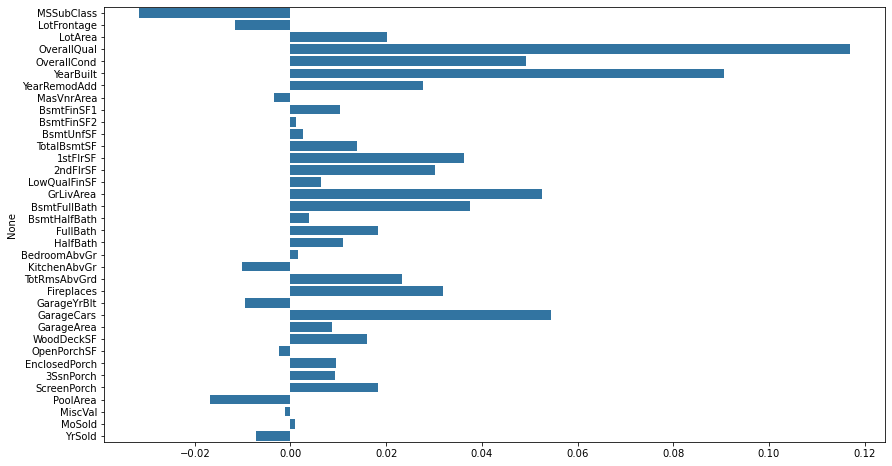

In [30]:
# достаем обученную модель из параметров
plot = sns.barplot(y=num_features, x=simple_pipeline.named_steps['model'].coef_)
plot.figure.set_size_inches(14, 8)

### Что еще у нас есть для num признаков?

https://scikit-learn.org/1.5/api/sklearn.preprocessing.html
https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
simple_pipeline = Pipeline([
    ('imp_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', Ridge()),
])

In [33]:
simple_pipeline.fit(X_train_numeric, np.log(y_train))

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()), ('model', Ridge())])

In [34]:
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {mean_absolute_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)

RMSE:  train: 13771.286752912527 test: 61321.66803754553
MAE:  train: 9467.82109105281 test: 26182.71796771116


In [35]:
# признаков стало намного больше
len(simple_pipeline.named_steps['model'].coef_)

703

In [36]:
# добавим параметров в ridge
simple_pipeline = Pipeline([
    ('imp_mean', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', Ridge(max_iter=100, tol=0.1, random_state=0, alpha=100)),
])

In [37]:
simple_pipeline.fit(X_train_numeric, np.log(y_train))

Pipeline(steps=[('imp_mean', SimpleImputer()), ('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model',
                 Ridge(alpha=100, max_iter=100, random_state=0, tol=0.1))])

In [38]:
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {mean_absolute_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)

RMSE:  train: 15769.481132386565 test: 35148.94650156681
MAE:  train: 10690.463624639877 test: 18646.703476729643


In [39]:
# добавим параметров в ridge
simple_pipeline = Pipeline([
    ('imp_mean', SimpleImputer(strategy='mean')),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
#     ('polynomial', PolynomialFeatures(degree=2)),
    ('model', Ridge(max_iter=100, tol=0.1, random_state=0, alpha=100)),
])

In [40]:
simple_pipeline.fit(X_train_numeric, np.log(y_train))

Pipeline(steps=[('imp_mean', SimpleImputer()),
                ('polynomial', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('model',
                 Ridge(alpha=100, max_iter=100, random_state=0, tol=0.1))])

In [41]:
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {mean_absolute_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)

RMSE:  train: 18916.091761123032 test: 30917.189980228814
MAE:  train: 12818.131223623594 test: 17551.176431416152


### Что с признаками?

MSSubClass


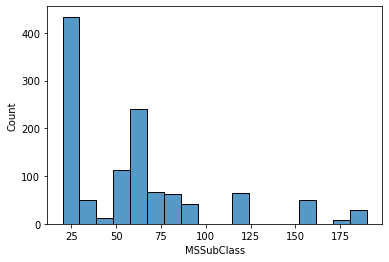

LotFrontage


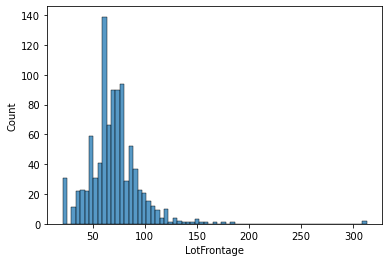

LotArea


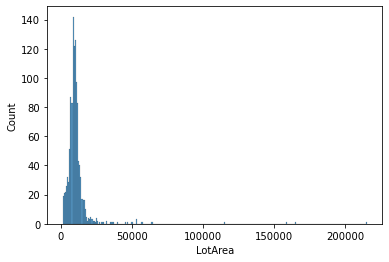

OverallQual


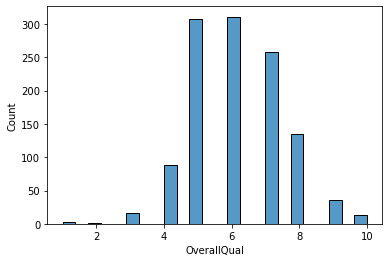

OverallCond


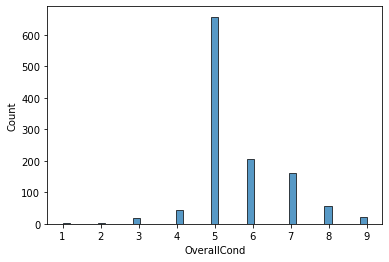

YearBuilt


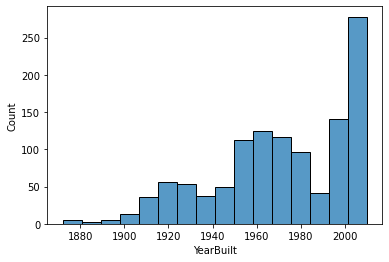

YearRemodAdd


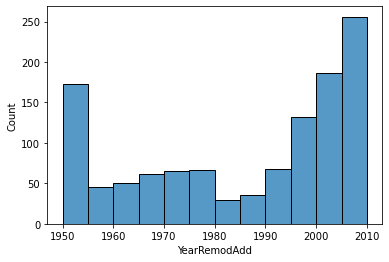

MasVnrArea


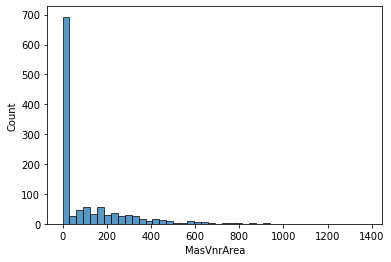

BsmtFinSF1


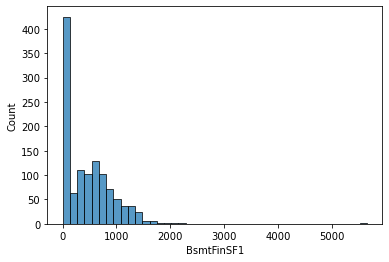

BsmtFinSF2


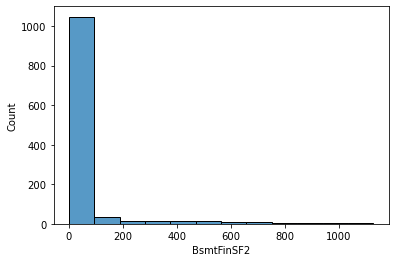

BsmtUnfSF


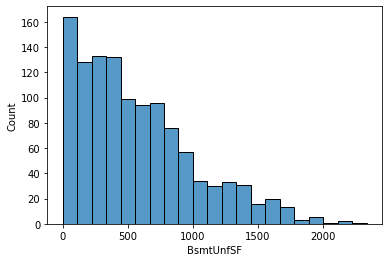

TotalBsmtSF


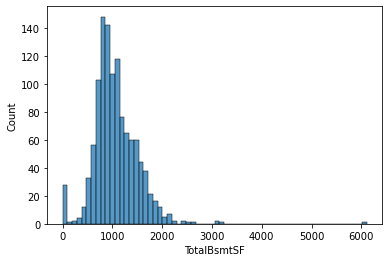

1stFlrSF


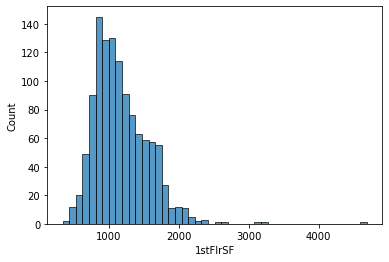

2ndFlrSF


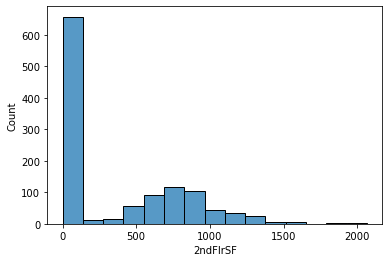

LowQualFinSF


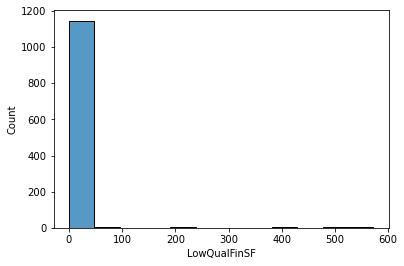

GrLivArea


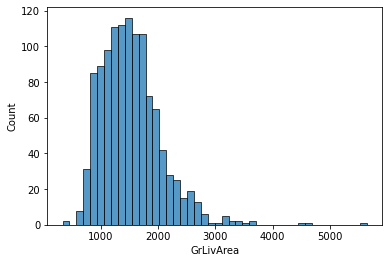

BsmtFullBath


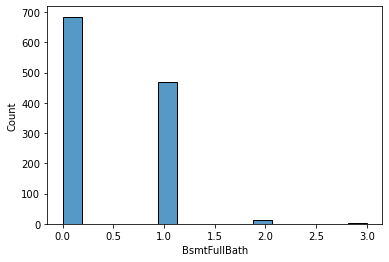

BsmtHalfBath


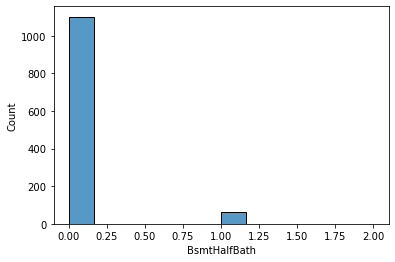

FullBath


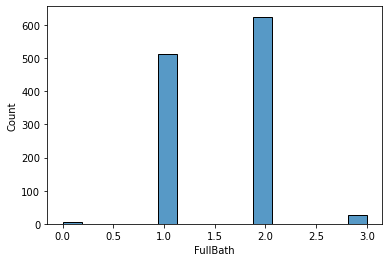

HalfBath


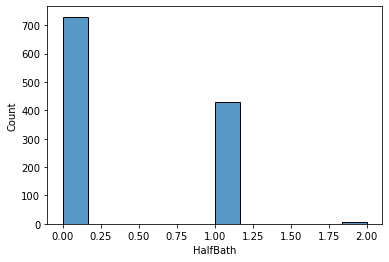

BedroomAbvGr


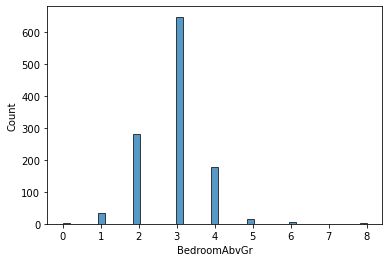

KitchenAbvGr


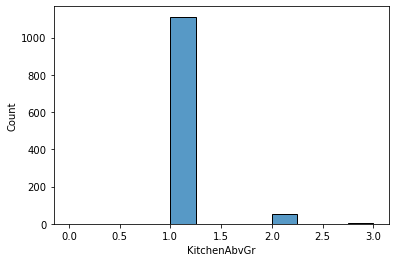

TotRmsAbvGrd


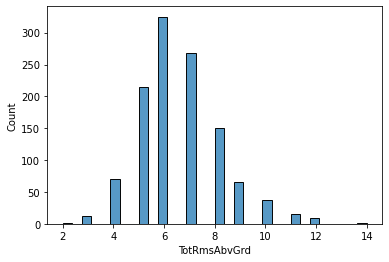

Fireplaces


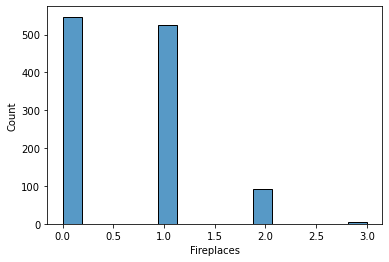

GarageYrBlt


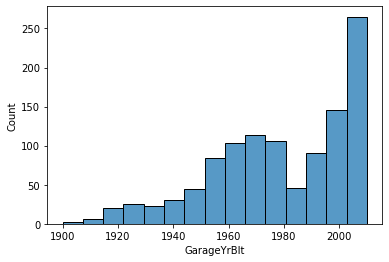

GarageCars


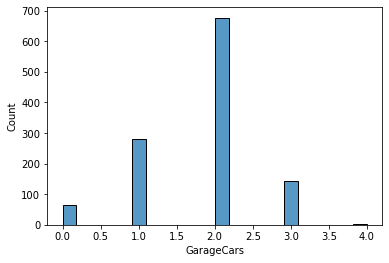

GarageArea


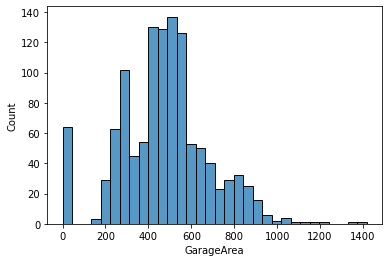

WoodDeckSF


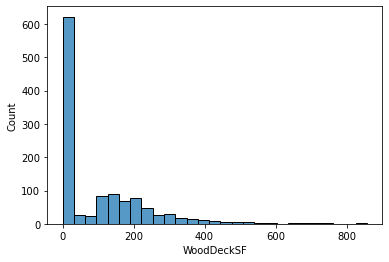

OpenPorchSF


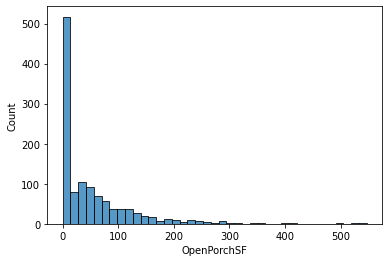

EnclosedPorch


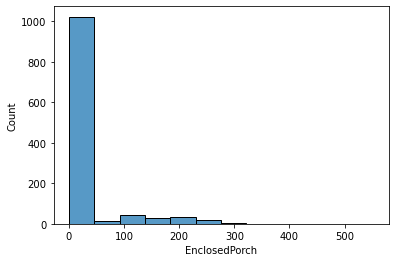

3SsnPorch


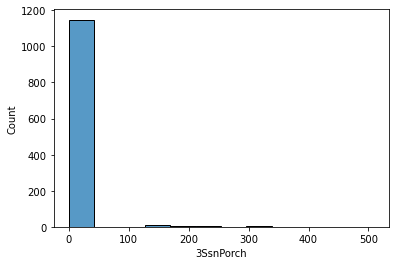

ScreenPorch


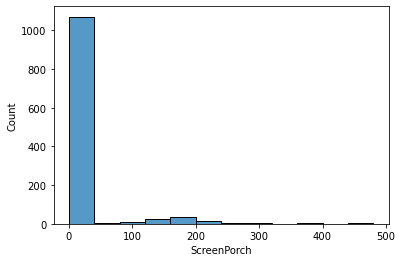

PoolArea


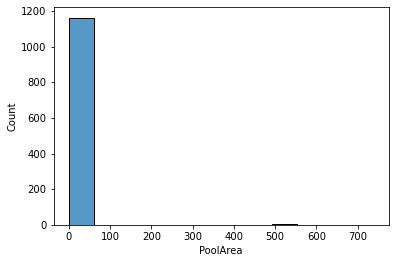

MiscVal


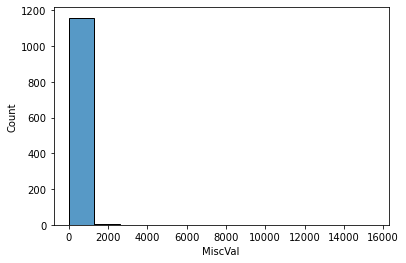

MoSold


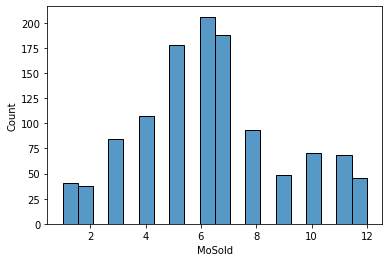

YrSold


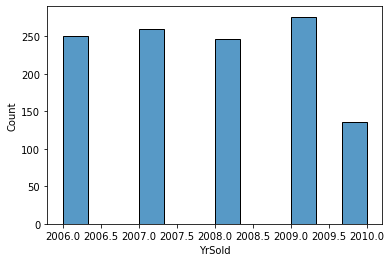

In [42]:
for col in X_train_numeric.columns:
    print(col)
    sns.histplot(X_train_numeric[col])
    plt.show()

In [43]:
log_scale_features = [
    'LotFrontage', 
    'LotArea',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    'GrLivArea',
]

/var/folders/3c/zb3vq_6960dbkm_ndj8dmrk40000gn/T/ipykernel_11835/4032807954.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3c/zb3vq_6960dbkm_ndj8dmrk40000gn/T/ipykernel_11835/4032807954.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3c/zb3vq_6960dbkm_ndj8dmrk40000gn/T/ipykernel_11835/4032807954.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3c/zb3vq_6960dbkm_ndj8dmrk40000gn/T/ipykernel_11835/4032807954.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3c/zb3vq_6960dbkm_ndj8dmrk40000gn/T/ipykernel_11835/4032807954.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/var/folders/3c/zb3vq_6960dbkm_ndj8dmrk40000gn/T/ipykernel_11835/4032807954.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown

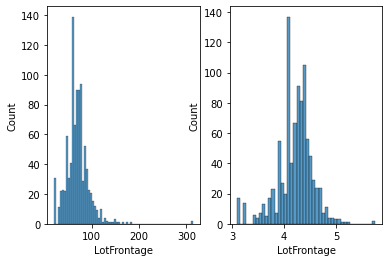

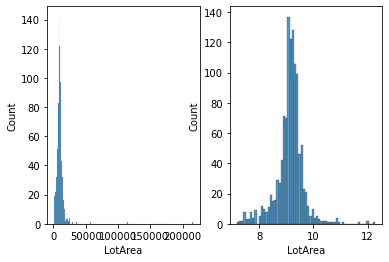

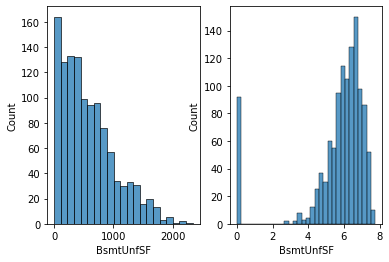

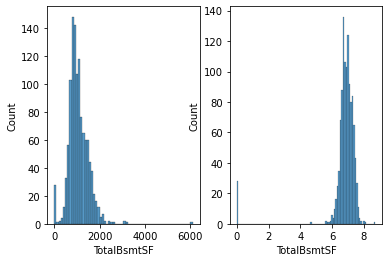

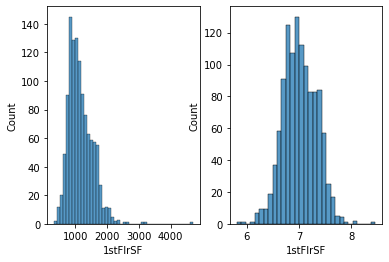

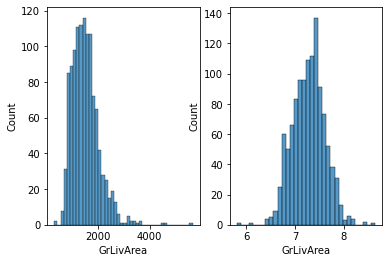

In [44]:
for col in log_scale_features:
    fig, ax = plt.subplots(1,2)
    sns.histplot(X_train_numeric[col], ax=ax[0])
    sns.histplot(np.log(X_train_numeric[col] + 1), ax=ax[1])
    fig.show()

https://www.andrewvillazon.com/custom-scikit-learn-transformers/

In [45]:
# пробуем написать свой трансформер
from sklearn.base import BaseEstimator, TransformerMixin

class LogScaleNumFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_transformed = X.copy()
        X_transformed[self.columns] = np.log(X_transformed[self.columns] + 1)
        return X_transformed

In [46]:
# добавляем в наш пайплайн кастомный трансформер
simple_pipeline = Pipeline([
    ('imp_mean', SimpleImputer(strategy='mean')),
    ('log_scaler', LogScaleNumFeatures(columns=log_scale_features)),
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', Ridge(max_iter=100, tol=0.1, random_state=0, alpha=100)),
])

In [47]:
simple_pipeline.fit(X_train_numeric, np.log(y_train))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [48]:
class CustomSimpleImputer(SimpleImputer, BaseEstimator):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    def transform(self, X, y=None):
        transformed_X = super().transform(X)
        new_X = pd.DataFrame(transformed_X, columns=self.feature_names_in_)
        
        return new_X

In [49]:
# добавляем в наш пайплайн кастомный трансформер и кастомный SimpleImputer
simple_pipeline = Pipeline([
    ('custom_imp_mean', CustomSimpleImputer(strategy='mean')),
    ('log_scaler', LogScaleNumFeatures(columns=log_scale_features)),
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('model', Ridge(max_iter=100, tol=0.1, random_state=0, alpha=100)),
])

In [50]:
simple_pipeline.fit(X_train_numeric, np.log(y_train))

Pipeline(steps=[('custom_imp_mean', CustomSimpleImputer()),
                ('log_scaler',
                 LogScaleNumFeatures(columns=['LotFrontage', 'LotArea',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', 'GrLivArea'])),
                ('scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model',
                 Ridge(alpha=100, max_iter=100, random_state=0, tol=0.1))])

In [51]:
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(np.exp(simple_pipeline.predict(X_train_numeric)), y_train)}',
    f'test: {mean_absolute_error(np.exp(simple_pipeline.predict(X_test_numeric)), y_test)}',
)

RMSE:  train: 16002.118232875173 test: 34185.111654942826
MAE:  train: 10681.424787064476 test: 18959.213141984616


### Категорийальные признаки

https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [59]:
cat_features = data_train.select_dtypes('object').columns
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [54]:
categorical_transformer = Pipeline(steps=[
    ('imp_most_freq', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore')) # оставим на домашку
])

In [55]:
import fasttext

model = fasttext.load_model("cc.en.300.bin")

https://fasttext.cc/docs/en/support.html

In [56]:
class FastTextEmb(BaseEstimator, TransformerMixin):    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return np.array(list(map(lambda x: model.get_sentence_vector(x), (X + ' ').sum(axis=1))))

In [62]:
simple_pipeline = Pipeline(steps=[
    ('imp_most_freq', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore')) # оставим на домашку,
    ('fasttext_emb', FastTextEmb()),
    ('model', Ridge(max_iter=100, tol=0.1, random_state=0, alpha=100)),
])

In [63]:
simple_pipeline.fit(X_train[cat_features], np.log(y_train))

Pipeline(steps=[('imp_most_freq', SimpleImputer(strategy='most_frequent')),
                ('fasttext_emb', FastTextEmb()),
                ('model',
                 Ridge(alpha=100, max_iter=100, random_state=0, tol=0.1))])

In [64]:
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_train[cat_features])), y_train)}',
    f'test: {root_mean_squared_error(np.exp(simple_pipeline.predict(X_test[cat_features])), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(np.exp(simple_pipeline.predict(X_train[cat_features])), y_train)}',
    f'test: {mean_absolute_error(np.exp(simple_pipeline.predict(X_test[cat_features])), y_test)}',
)

RMSE:  train: 77907.14867427568 test: 87730.0993027011
MAE:  train: 54088.465352097606 test: 59316.59433861302


### Собираем все вместе

In [65]:
num_features = data_train.select_dtypes(np.number).drop(columns=['Id', 'SalePrice']).columns
num_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [66]:
cat_features = data_train.select_dtypes('object').columns
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [75]:
num_transformer = Pipeline([
    ('custom_imp_mean', CustomSimpleImputer(strategy='mean')),
    ('log_scaler', LogScaleNumFeatures(columns=log_scale_features)),
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
#     ('model', Ridge(max_iter=100, tol=0.1, random_state=0, alpha=100)), # модель в конце
])
cat_transformer = Pipeline(steps=[
    ('imp_most_freq', SimpleImputer(strategy='most_frequent')),
    ('fasttext_emb', FastTextEmb()),
#     ('model', Ridge(max_iter=100, tol=0.1, random_state=0, alpha=100)),
])

In [77]:
nt = num_transformer.fit(X_train[num_features])
nt.transform(X_train[num_features])

array([[ 1.        , -0.8667643 ,  0.13268359, ...,  0.01780001,
        -0.22014625,  2.72271541],
       [ 1.        ,  0.07410996, -0.40363068, ...,  0.25807386,
        -0.4539968 ,  0.79865934],
       [ 1.        , -0.63154574, -0.00486242, ...,  0.25807386,
        -0.06974444,  0.01884843],
       ...,
       [ 1.        , -0.8667643 , -0.35096852, ...,  0.77898756,
         1.21400779,  1.89196208],
       [ 1.        , -0.16110861, -0.62344113, ...,  0.01780001,
         0.08259804,  0.38328267],
       [ 1.        ,  1.48542135, -0.739308  , ...,  0.01780001,
        -0.11923148,  0.79865934]])

In [78]:
nt.transform(X_test[num_features])

array([[ 1.        , -0.8667643 ,  0.13268359, ...,  2.66273451,
         2.24450278,  1.89196208],
       [ 1.        ,  0.07410996,  1.19183331, ...,  0.77898756,
        -1.4563521 ,  2.72271541],
       [ 1.        , -0.63154574, -0.56705049, ...,  1.58054111,
        -2.07445502,  2.72271541],
       ...,
       [ 1.        ,  0.07410996, -0.19801173, ...,  1.86310315,
         0.18739414,  0.01884843],
       [ 1.        ,  0.30932853, -0.35096852, ...,  1.86310315,
         1.2198298 ,  0.79865934],
       [ 1.        , -0.8667643 ,  0.13268359, ...,  0.05816602,
         0.21553384,  0.79865934]])

In [69]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    transformers=[
        ('num', num_transformer, list(num_features)),
        ('cat', cat_transformer, list(cat_features)),
    ]
)

In [70]:
pipeline = Pipeline([
    ('ct', ct),
    ('model',  Ridge(max_iter=100, tol=0.1, random_state=0, alpha=100))
])

In [71]:
pipeline.fit(X_train, np.log(y_train))

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('custom_imp_mean',
                                                                   CustomSimpleImputer()),
                                                                  ('log_scaler',
                                                                   LogScaleNumFeatures(columns=['LotFrontage',
                                                                                                'LotArea',
                                                                                                'BsmtUnfSF',
                                                                                                'TotalBsmtSF',
                                                                                                '1stFlrSF',
                                                                                                'GrLivArea'])),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('polynomial',
                                                                   PolynomialFeatures())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'Overall...
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model',
                 Ridge(alpha=100, max_iter=100, random_state=0, tol=0.1))])

In [72]:
print(
    'RMSE: ',
    f'train: {root_mean_squared_error(np.exp(pipeline.predict(X_train)), y_train)}',
    f'test: {root_mean_squared_error(np.exp(pipeline.predict(X_test)), y_test)}',
)
print(
    'MAE: ',
    f'train: {mean_absolute_error(np.exp(pipeline.predict(X_train)), y_train)}',
    f'test: {mean_absolute_error(np.exp(pipeline.predict(X_test)), y_test)}',
)

RMSE:  train: 16000.448492244213 test: 34182.75920113886
MAE:  train: 10680.247112116767 test: 18957.172851672953


In [ ]:
pipeline.set_params()

In [73]:
pipeline.get_params()

{'memory': None,
 'steps': [('ct', ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('custom_imp_mean',
                                                     CustomSimpleImputer()),
                                                    ('log_scaler',
                                                     LogScaleNumFeatures(columns=['LotFrontage',
                                                                                  'LotArea',
                                                                                  'BsmtUnfSF',
                                                                                  'TotalBsmtSF',
                                                                                  '1stFlrSF',
                                                                                  'GrLivArea'])),
                                                    ('scaler', StandardScaler()),
                                                    (

In [74]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
254,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1957,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,Rec,922,Unf,0,392,1314,GasA,TA,Y,SBrkr,1314,0,0,1314,1,0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1957.0,RFn,1,294,TA,TA,Y,250,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,7,1993,1994,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,799,799,GasA,Gd,Y,SBrkr,799,772,0,1571,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,RFn,2,380,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
638,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1910,1950,Gable,CompShg,MetalSd,Wd Sdng,NaN,0.0,TA,TA,CBlock,Fa,TA,No,Unf,0,Unf,0,796,796,GasA,Gd,Y,FuseA,796,0,0,796,0,0,1,0,2,1,TA,4,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,P,328,0,164,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,85000
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,7,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,569,Unf,0,162,731,GasA,Ex,Y,SBrkr,981,787,0,1768,1,0,1,1,3,1,Gd,7,Typ,2,TA,Detchd,1939.0,Unf,1,240,TA,TA,Y,0,0,264,0,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000
380,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218,Unf,0,808,1026,GasA,TA,Y,SBrkr,1026,665,0,1691,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1,308,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,127000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,Gd,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
1130,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,4,3,1928,1950,Gable,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,622,Unf,0,500,1122,GasA,TA,Y,SBrkr,1328,653,0,1981,1,0,2,0,4,1,Gd,7,Min2,2,TA,Detchd,1981.0,Unf,2,576,TA,TA,Y,431,44,0,0,0,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1955,1990,Hip,CompShg,WdShing,Plywood,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,167,Unf,0,697,864,GasA,TA,Y,SBrkr,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1957.0,Unf,2,572,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
860,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,8,1918,1998,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,912,912,GasA,Gd,Y,SBrkr,912,514

### Что не стали кодить...

#### Работа с текстами

https://scikit-learn.org/dev/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html <br>
https://scikit-learn.org/dev/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

любые эмбедеры и тд

#### Разложение (будет отдельный семинар)

https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html <br>
https://umap-learn.readthedocs.io/en/latest/

#### Категорийальные фичи

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html <br>
https://www.kaggle.com/code/subinium/11-categorical-encoders-and-benchmark

#### Бинаризация

https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

#### Выходы/предкиты других моделей (будут отдельные лекции)

https://alexanderdyakonov.wordpress.com/2017/03/10/c%D1%82%D0%B5%D0%BA%D0%B8%D0%BD%D0%B3-stacking-%D0%B8-%D0%B1%D0%BB%D0%B5%D0%BD%D0%B4%D0%B8%D0%BD%D0%B3-blending/